In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage

import bz2
import _pickle

In [2]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams.update({'font.size': 18})
original_matlab_data_path = 'data/SVD-Meaningful_PCs/allFaces.mat'
pickle_data_path = 'data/SVD-Meaningful_PCs/faces.pkl.pbz2'

In [3]:
modify_x_people = 3
rotation_in_deg = 10.0

In [4]:
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = _pickle.load(data)
    return data.to_numpy()

In [5]:
training_faces = decompress_pickle(pickle_data_path)
m = 168
n = 192
# person 1 has 64 pictures, person 2 has 62 pictures etc.
n_faces = [64, 62, 64, 64, 62, 64, 64, 64, 64, 64, 60, 59, 60, 63, 62, 63, 63,
           64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,
           64, 64]

people = len(n_faces)
print(f"There are {people} people in total.")

There are 36 people in total.


In [6]:
total_pixels = training_faces.shape[0]
total_amount_of_pictures = training_faces.shape[1]

In [7]:
split_data_in_half_delimiter = np.sum(n_faces[:modify_x_people])

split_training_faces = np.split(training_faces, [split_data_in_half_delimiter], axis=1)
faces_to_modify = split_training_faces[0]
intact_faces = split_training_faces[1]

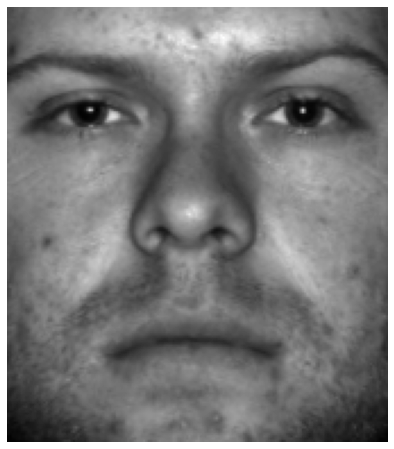

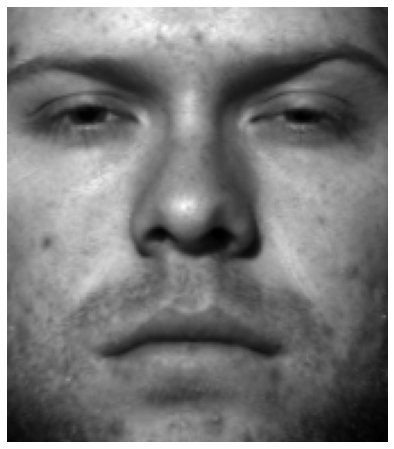

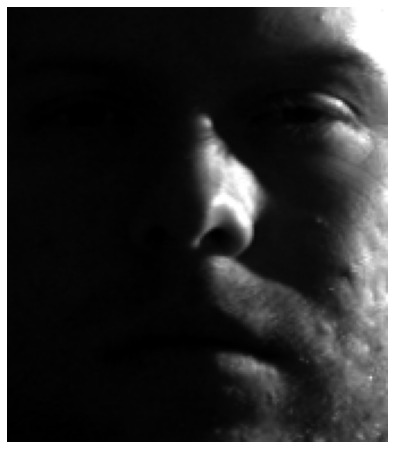

In [8]:
for i, col in enumerate(faces_to_modify.T):

    # plot some faces
    if i == 0 or i == 10 or i == 58:
        fig1 = plt.figure()

        ax1 = fig1.add_subplot(111)
        np_avg_face = np.reshape(col, (m, n)).T
        img_avg = ax1.imshow(np_avg_face)
        img_avg.set_cmap('gray')
        plt.axis('off')

        plt.show()

In [9]:
modified_faces = np.ndarray([total_pixels, ])
for i, col in enumerate(faces_to_modify.T):
    image = np.reshape(col, (m, n)).T
    image = scipy.ndimage.rotate(image, rotation_in_deg, reshape=False)
    flattened_image = np.ndarray.flatten(image.T)
    modified_faces = np.vstack((modified_faces, flattened_image))

modified_faces = np.delete(modified_faces, 0 , 0)
modified_faces = modified_faces.T

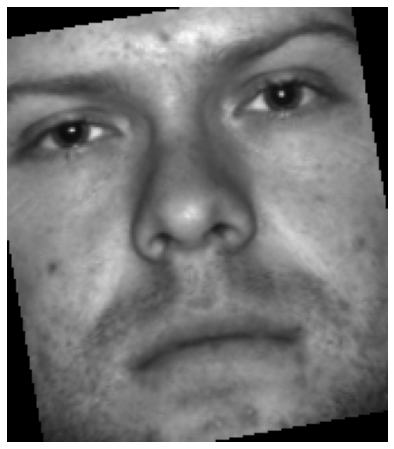

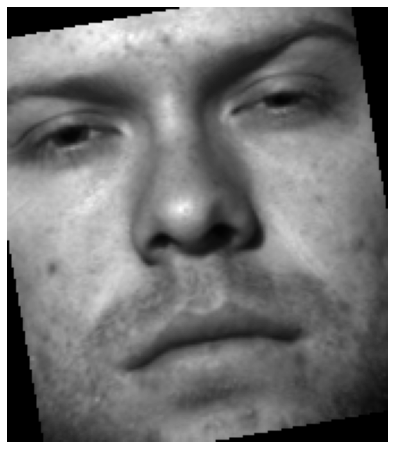

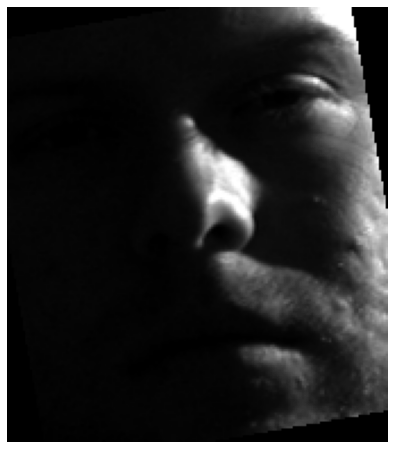

In [10]:
for i, col in enumerate(modified_faces.T):

    # plot some faces
    if i == 0 or i == 10 or i == 58:
        fig1 = plt.figure()

        ax1 = fig1.add_subplot(111)
        np_avg_face = np.reshape(col, (m, n)).T
        img_avg = ax1.imshow(np_avg_face)
        img_avg.set_cmap('gray')
        plt.axis('off')

        plt.show()

In [11]:
training_faces_merged = np.concatenate((modified_faces, intact_faces), axis=1)

In [12]:
avg_face = np.mean(training_faces_merged, axis=1)

X = training_faces_merged - np.tile(avg_face, (total_amount_of_pictures, 1)).T
u, sigma, vT = np.linalg.svd(X, full_matrices=False)

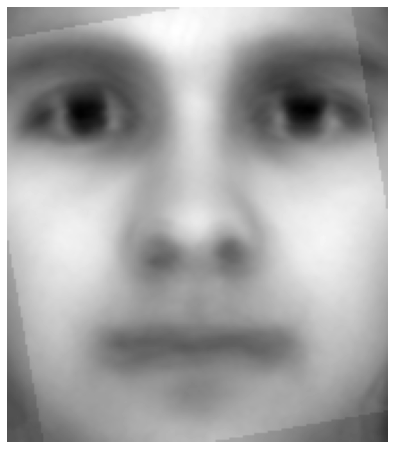

In [13]:
fig1 = plt.figure()

# Average face:

ax1 = fig1.add_subplot(111)
np_avg_face = np.reshape(avg_face, (m, n)).T
img_avg = ax1.imshow(np_avg_face)
img_avg.set_cmap('gray')
plt.axis('off')

plt.show()

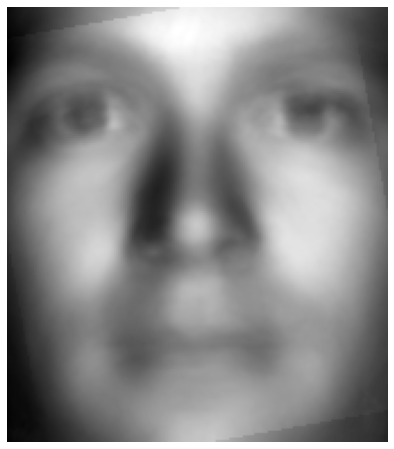

In [14]:
fig2 = plt.figure()

# (Inverted)\n correlated face:

ax3 = fig2.add_subplot(111)
correlated_face = np.reshape(u[:, 0], (m, n)).T
img_u2 = ax3.imshow(correlated_face)
img_u2.set_cmap('gray')
plt.axis('off')


plt.show()